## Dado el dataset Iris de Scikit Learn contesta a las siguientes preguntas:

1. ¿Cuál es el algoritmo más óptimo para poder predecir la etiqueta de una nueva muestra? Defiéndelo
2. Devuelve el algoritmo lo más optimizado posible

In [10]:
# Cargamos las librerías necesarias
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import pandas as pd
import matplotlib as plt

In [11]:
# Cargamos el dataset iris como objeto Bunch desde la biblioteca de scikit-learn
iris = load_iris()

# Lo convertimos en un dataframe para poder analizar su contenido
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["y"] = iris.target
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   y                  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



c:\Users\SergioSF\Desktop\Programacion de Modelos de IA\Ejercicios y apuntes\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


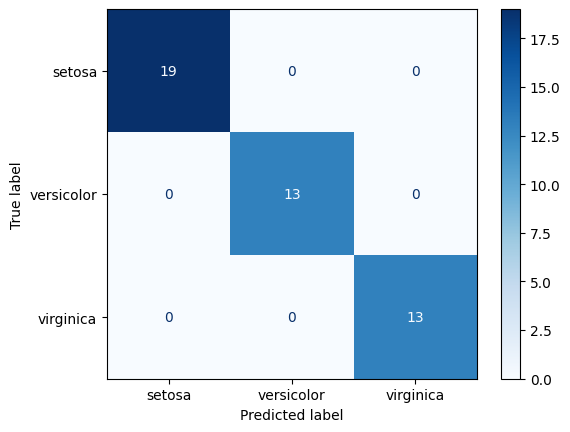

In [12]:
# Definimos las variables predictoras y la variable objetivo
X = iris.data
y = iris.target

# Estandarizamos los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividimos los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Creamos el modelo de regresión logística multinominal
model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=500) # El parámetro " multi_class='mulnominal' " es el que determina que este modelo de RL sea multinominal

# Entrenamos el modelo
model.fit(X_train, y_train)

# Realizamos las predicciones
y_pred = model.predict(X_test)

# Mostramos el reporte de la clasificación
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Creamos la matriz de confusión y la mostramos
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=iris.target_names, cmap= plt.colormaps.get_cmap("Blues"))

Accuracy: 100.00%


[Text(0.3076923076923077, 0.9285714285714286, 'petal length (cm) <= -0.743\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]\nclass = versicolor'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = setosa'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'petal length (cm) <= 0.564\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]\nclass = versicolor'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'petal width (cm) <= 0.527\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'petal width (cm) <= 0.725\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]\nclass = virg

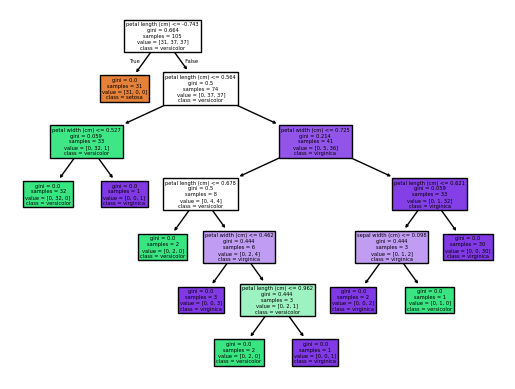

In [14]:
# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualizar el árbol de decisión
tree.plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names) # La función plot_tree nos permite visualizar el árbol de decisión para ver cómo el modelo toma decisiones en función de las características. filled=True colorea los nodos para distinguir mejor las clases, feature_names asigna nombres a las características, class_name asigna nombres a las clases.